<a href="https://colab.research.google.com/github/jihyeon65/jihyeon65/blob/main/KNN_%E1%84%80%E1%85%A7%E1%86%AF%E1%84%80%E1%85%AA%E1%84%87%E1%85%A9%E1%84%80%E1%85%A9%E1%84%89%E1%85%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **k-NN 분류기**

- 22310303 안지현


### **1. Iris dataset을 이용한 k-NN 분류기**

- 특징 중에서 sepal length와 sepal width만을 사용함.
- IRIS dataset (150개) 중에 105개는 학습용, 45개는 테스용으로 사용함.
  - train_test_split()함수에서 random_state=42로 고정함.
- k 값을 3~9까지 변환시키면서 성능을 측정함.

#### **1-1. IRIS dataset 읽기, 학습 및 테스트용 데이터셋 만들기**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# iris dataset 읽기
iris = load_iris()
iris.feature_names = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)

# sepal length와 petal width로 데이터셋 구성하기
print('1: dataset')
X = iris_df.iloc[:, [0, 1]]
y = iris_df.iloc[:, -1]
print('Wn1-1: X[0:3] = \n', X[0:3])
print('Wn1-2: y[0:3] = \n', y[0:3])

# 학습 및 테스트 데이터셋 구성하기 (105:45), random_state는 42로 할 것
print('Wn2: train & test dataset')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('2-1: X_train.shape, X_test.shape = ', X_train.shape, X_test.shape)
print('2-2: y_train.shape, y_test.shape = ', y_train.shape, y_test.shape)

print('Wn3: train & test samples')
print('3-1: X_train[0:3] = \n', X_train[0:3])
print('3-2: y_train[0:3] = \n', y_train[0:3])


1: dataset
Wn1-1: X[0:3] = 
    sepal.length  sepal.width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
Wn1-2: y[0:3] = 
 0    0
1    0
2    0
Name: target, dtype: int64
Wn2: train & test dataset
2-1: X_train.shape, X_test.shape =  (105, 2) (45, 2)
2-2: y_train.shape, y_test.shape =  (105,) (45,)
Wn3: train & test samples
3-1: X_train[0:3] = 
      sepal.length  sepal.width
81            5.5          2.4
133           6.3          2.8
137           6.4          3.1
3-2: y_train[0:3] = 
 81     1
133    2
137    2
Name: target, dtype: int64


#### **1-2. 학습 및 테스트 데이터의 시각화**

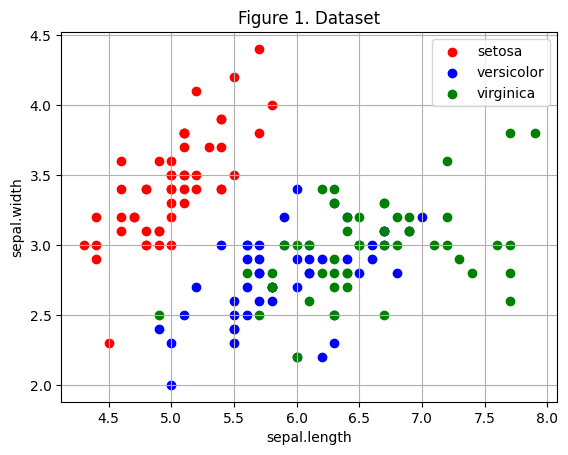

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

style.use('default')
fig, ax = plt.subplots()

# Setosa, Versicolor, Virginica 데이터 포인트를 각각 다른 색상으로 그리기
ax.scatter(X[y == 0]['sepal.length'], X[y == 0]['sepal.width'], color='red', label='setosa')
ax.scatter(X[y == 1]['sepal.length'], X[y == 1]['sepal.width'], color='blue', label='versicolor')
ax.scatter(X[y == 2]['sepal.length'], X[y == 2]['sepal.width'], color='green', label='virginica')

# 레이블과 제목 설정
ax.set_xlabel('sepal.length')
ax.set_ylabel('sepal.width')
ax.set_title('Figure 1. Dataset')

# 범례 추가
ax.legend()

# 격자 추가
plt.grid(True)

# 그래프 표시
plt.show()

#### **1-3. k 값을 3~9까지 변환시키면서 성능을 측정함.**

- 이때 knn 분류기는 아래와 같은 함수 prototype에 대해 구현
  - def iris_knn(X_train, y_train, X_test, y_test, k):    

In [ ]:
def iris_knn(X_train, y_train, X_test, y_test, k):
    # KNN 모델 생성
    knn = KNeighborsClassifier(n_neighbors=k)

    # 모델 학습
    knn.fit(X_train, y_train)

    # 예측 수행
    y_pred = knn.predict(X_test)

    # 정확도 계산하여 반환
    return metrics.accuracy_score(y_test, y_pred)

print('\n5: k에 따른 정확도 계산')
scores = {}

# k값 3~9까지 반복하면서 정확도 계산
for k in range(3, 10):
    score = iris_knn(X_train, y_train, X_test, y_test, k)
    scores[k] = score

# scores의 키값과 값들을 원하는 형식으로 출력
print("scores.keys() =", scores.keys())
print("scores.values() =", scores.values())


5: k에 따른 정확도 계산
scores.keys() = dict_keys([3, 4, 5, 6, 7, 8, 9])
scores.values() = dict_values([0.7555555555555555, 0.7333333333333333, 0.7777777777777778, 0.7777777777777778, 0.8, 0.7777777777777778, 0.8])


#### **1-4. k 값에 따른 정확도를 막대 그래프로 시각화**

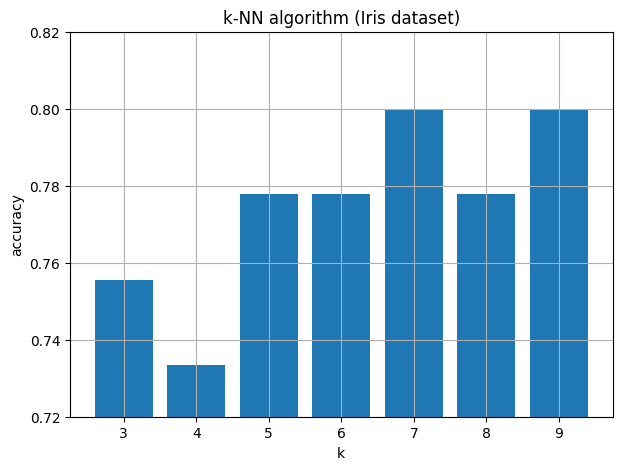

In [ ]:
import matplotlib.pyplot as plt
# 막대그래프 k vs accuracy 그래프 그리기
plt.figure(figsize=(7, 5))
plt.bar(scores.keys(), scores.values())
plt.title('k-NN algorithm (Iris dataset)')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid(True)
plt.ylim(0.72, 0.82)

# 그래프 표시
plt.show()